## Part (1) => Linear Regression From Scratch


Importing Libraries


In [14]:
import numpy as np
import matplotlib.pyplot as plt

Generating Data

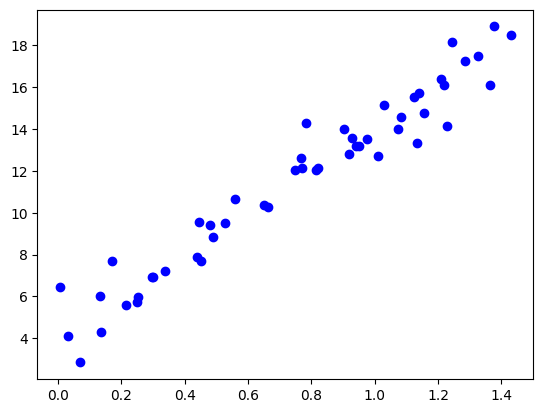

In [15]:
rng = np.random.RandomState(10)
x = 1.5 * rng.rand(50)
y = 10* x +4 + rng.randn(50)

plt.scatter(x, y, color='b')
m=x.shape[0]

Cost fn

In [16]:
def cost(x_hat, x):
    l = np.abs(x_hat - x) ** 3
    cost = l.mean()
    return cost

Hypothesis

In [17]:
def hypothesis(y, w, b):
    return (y-b)/w

Gradient Descent

In [18]:
def gradient_descent(x,y,w,b,learning_rate,m):
   x_hat=hypothesis(y,w,b)
   dw = (3.0/m) * np.sum(np.multiply((-x)/w,(x_hat-x),np.abs(x_hat-x)))
   db = (3.0/m) * np.sum(np.multiply((-1)/w,(x_hat-x),np.abs(x_hat-x)))
   w = w -learning_rate * dw
   b = b - learning_rate * db
   return w,b

Implementation

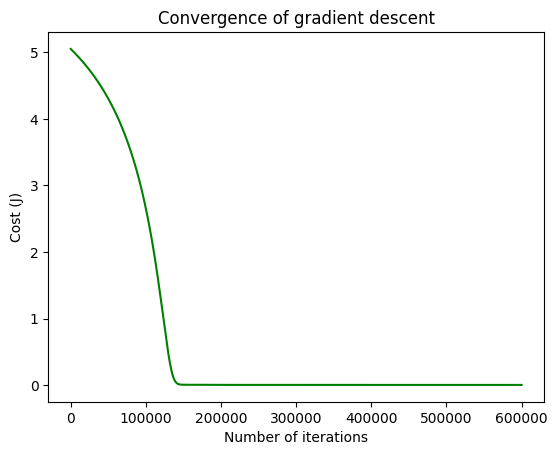

In [19]:
w = 100
b = 100
learning_rate = 0.01
num_epochs = 600000

L = []
for i in range(num_epochs):
    w, b = gradient_descent(x, y, w, b, learning_rate, m)
    x_hat = hypothesis(x, w, b)
    L.append(cost((y-b)/w, x))


plt.plot(L,'g')
plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Convergence of gradient descent')
plt.show()
    

Results

Obtained value of w: 9.810133401530546
Obtained value of b: 4.184532725239542
Obtained line: y=9.810133401530546x+4.184532725239542


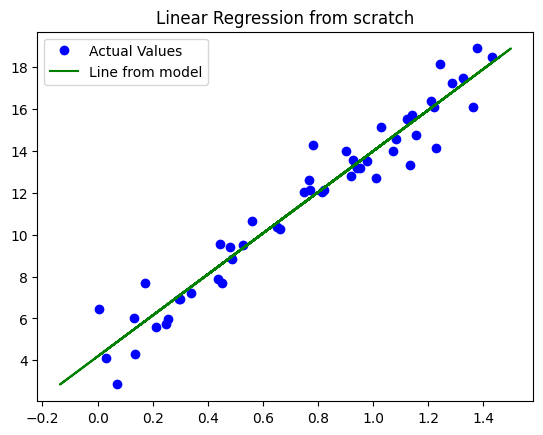

In [20]:
print(f"Obtained value of w: {w}")
print(f"Obtained value of b: {b}")
print(f"Obtained line: y={w}x+{b}")

plt.plot(x,y,'bo',label='Actual Values')
plt.plot((y-b)/w,y,'g',label='Line from model')
plt.title("Linear Regression from scratch")
plt.legend()
plt.show()


## Part (2) => Using Sklearn (Scikit)

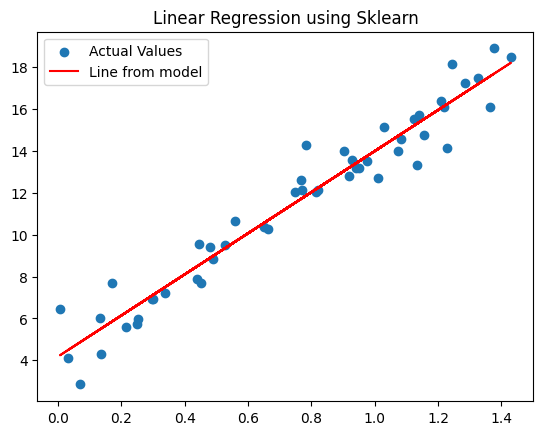

In [21]:
import numpy as np
from sklearn.linear_model import LinearRegression

model = LinearRegression(fit_intercept = True)
model.fit(x[:,np.newaxis], y[:, np.newaxis])

plt.title("Linear Regression using Sklearn")
y_pred=model.predict(x[:,np.newaxis])
plt.scatter(x, y,label='Actual Values')
plt.plot(x, y_pred,color='r',label='Line from model')
plt.legend()


## Part (3) => Polynomial Regression

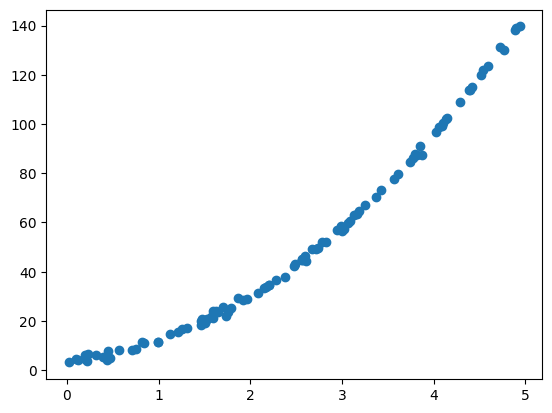

In [22]:
data = np.random.RandomState(10)
x = 5 * data.rand(100, 1)
y = 3 * x + 5 * x**2 + 4 + data.randn(100, 1)
m = x.shape[0]
plt.scatter(x, y)

Splitting Dataset

In [23]:
split_ratio = 0.8
split_index = int(split_ratio * len(x))
x_train, y_train = x[:split_index], y[:split_index]
x_test, y_test = x[split_index:], y[split_index:]

Normalising

In [24]:
# Normalize the data
x_mean, x_std = np.mean(x_train), np.std(x_train)
y_mean, y_std = np.mean(y_train), np.std(y_train)

x_train_normalized = (x_train - x_mean) / x_std
y_train_normalized = (y_train - y_mean) / y_std

x_test_normalized = (x_test - x_mean) / x_std
y_test_normalized = (y_test - y_mean) / y_std


Constructing Polynomial Model

In [25]:
def add_polynomial_features(X, degree):
    X_poly = np.c_[X]  
    for d in range(2, degree + 1):
        X_poly = np.c_[X_poly, X**d]  
    return X_poly

degree = 2
X_poly_train = add_polynomial_features(x_train_normalized, degree)
X_poly_test = add_polynomial_features(x_test_normalized, degree)

def custom_loss(X, X_pred):
    return np.mean(np.abs(X - X_pred)**7)

def custom_loss_gradient(X, X_pred):
    gradient = -7 * np.sign(X - X_pred) * np.abs(X - X_pred)**6
    return gradient


Implementation and Plot

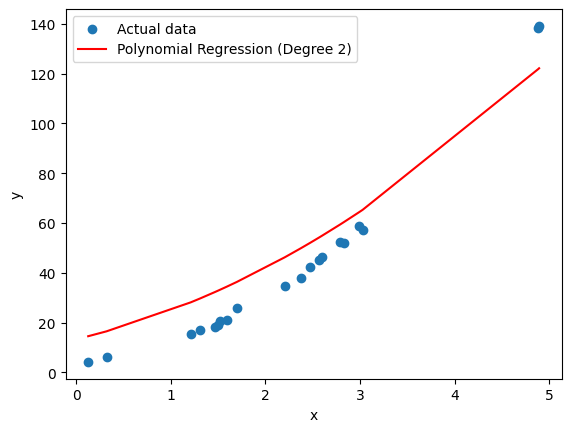

In [26]:
learning_rate = 0.001
num_epochs = 1000
m = len(y_train_normalized)
w = np.random.randn(X_poly_train.shape[1], 1)

for iteration in range(num_epochs):
    X_pred = X_poly_train.dot(w)
    gradients = X_poly_train.T.dot(custom_loss_gradient(y_train_normalized, X_pred))
    
   
    gradients = np.clip(gradients, -1, 1)
    
    w = w - learning_rate * gradients.reshape(-1, 1)

X_pred_test = X_poly_test.dot(w)


X_pred_test_denormalized = X_pred_test * y_std + y_mean

# Plot the results
plt.scatter(x_test, y_test, label='Actual data')
sorted_indices = np.argsort(x_test[:, 0])
plt.plot(x_test[sorted_indices], X_pred_test_denormalized[sorted_indices], color='r', label=f'Polynomial Regression (Degree {degree})')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()